# Quantile

This Jupyter notebook allows you to obtain the desired percentiles based on the data and the percentile you want to obtain

In [2]:
library(loadeR)
library(transformeR)
library(visualizeR)

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.


### Load Data

In [1]:
load("../pr_iberia01_1971-2015.Rdata")
pr <- data

load("../tasmax_iberia01_1971-2015.Rdata")
tmax <- data

rm(data)

### Reference Quantile

This function `ref_quantile`, calculate the reference quantiles, that are used later to make a comparison and binarize the data to work with.

In [3]:
seasons <- list(Winter = c(12, 1, 2), Spring = c(3, 4, 5), Summer = c(6, 7, 8), Autumn = c(9, 10, 11))

In [4]:
# Function to apply climatology to a dataset for a specific season and quantile level
ref_quantile <- function(data, quantile) {
    # data: a grid with the data
    # quantile: number of the quantile to calculate
  results <- list()
  for (season_name in names(seasons)) {
    season_month <- seasons[[season_name]]
    season_data <- subsetGrid(data, season = season_month)
    quantile_result <- climatology(season_data, clim.fun = list(FUN = "quantile", probs = quantile, na.rm = TRUE))
    results[[season_name]] <- quantile_result
  }
  return(results)
}

In [5]:
pr10 <- ref_quantile(pr, 0.10)
tmax90 <- ref_quantile(tmax, 0.90)

NOTE: Some data will be lost on year-crossing season subset (see the 'Time slicing' section of subsetGrid documentation for more details)
[2024-03-07 11:23:08] - Computing climatology...
[2024-03-07 11:23:12] - Done.
[2024-03-07 11:23:16] - Computing climatology...
[2024-03-07 11:23:21] - Done.
[2024-03-07 11:23:27] - Computing climatology...
[2024-03-07 11:23:35] - Done.
[2024-03-07 11:23:39] - Computing climatology...
[2024-03-07 11:23:45] - Done.
NOTE: Some data will be lost on year-crossing season subset (see the 'Time slicing' section of subsetGrid documentation for more details)
[2024-03-07 11:23:58] - Computing climatology...
[2024-03-07 11:24:05] - Done.
[2024-03-07 11:24:13] - Computing climatology...
[2024-03-07 11:24:17] - Done.
[2024-03-07 11:24:20] - Computing climatology...
[2024-03-07 11:24:24] - Done.
[2024-03-07 11:24:26] - Computing climatology...
[2024-03-07 11:24:30] - Done.


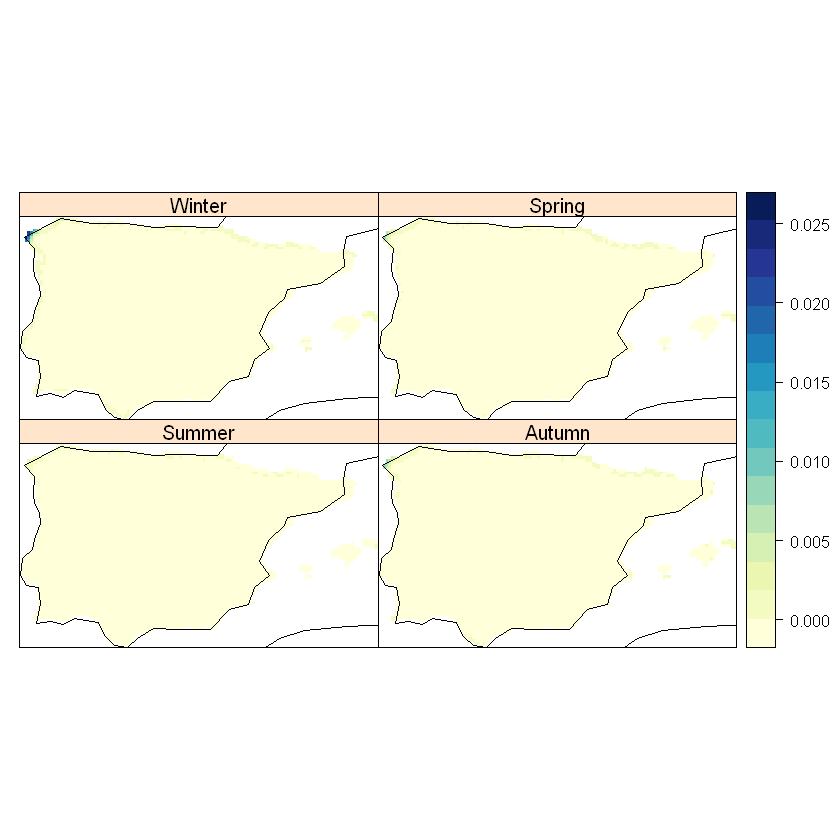

In [13]:
precip10 <- bindGrid(pr10$Winter, pr10$Spring, pr10$Summer, pr10$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(precip10, backdrop.theme = "coastline", color.theme = "YlGnBu", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

In [14]:
pr10_h <- readRDS("pr10_h.rds")

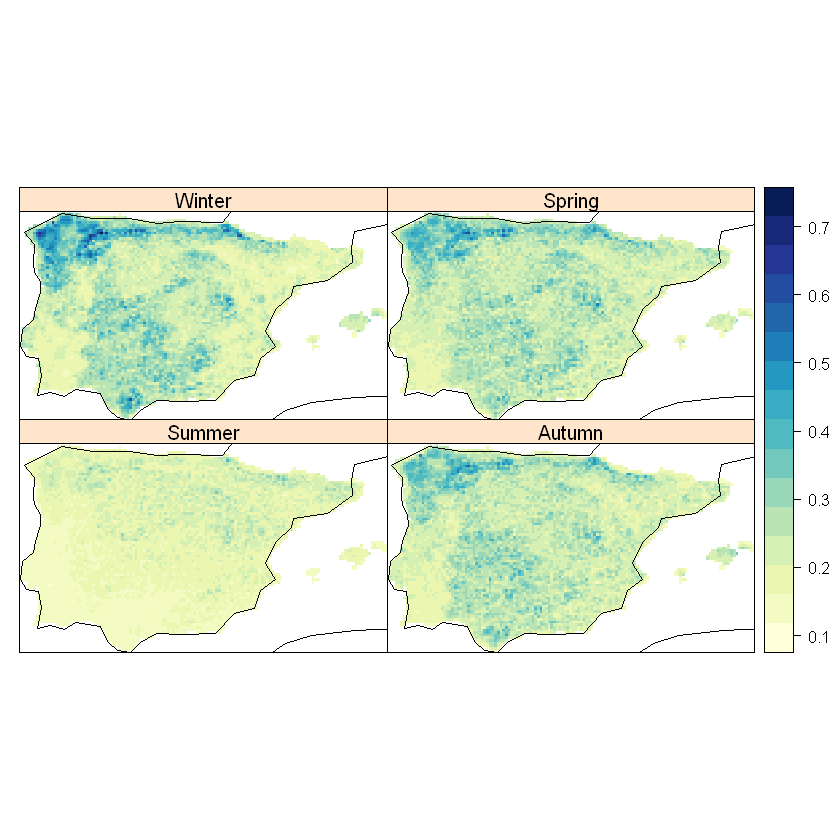

In [15]:
precip10_h <- bindGrid(pr10_h$Winter, pr10_h$Spring, pr10_h$Summer, pr10_h$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(precip10_h, backdrop.theme = "coastline", color.theme = "YlGnBu", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

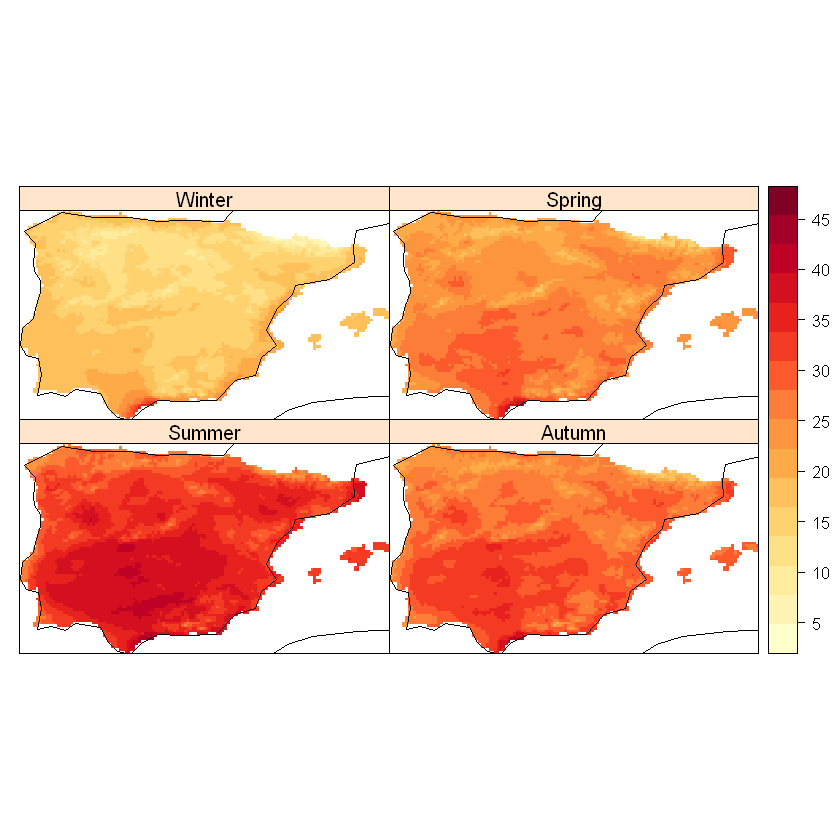

In [11]:
temp90 <- bindGrid(tmax90$Winter, tmax90$Spring, tmax90$Summer, tmax90$Autumn, dimension = "member", skip.temporal.check = TRUE)
spatialPlot(temp90, backdrop.theme = "coastline", color.theme = "YlOrRd", names.attr = c("Winter", "Spring", "Summer", "Autumn"), as.table = TRUE)

In [ ]:
spatialPlot()

### Data Saving

In [ ]:
saveRDS(pr05, file = "pr05.rds", compress = "xz")
saveRDS(tmax95, file = "tmax95.rds", compress = "xz")